In [1]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [168]:
r = requests.get("https://cs.wikipedia.org/wiki/Seznam_m%C4%9Bst_v_%C4%8Cesku_podle_po%C4%8Dtu_obyvatel")

In [170]:
soup = BeautifulSoup(r.text, 'html.parser')

In [172]:
mesta = {}
tabulka = soup.find(class_="sortable")
for radek in tabulka.find_all('tr'):
    if 'Rozloha' not in radek.text:
        mesta[radek.find_all('td')[1].text.strip()] = int(''.join([x for x in radek.find_all('td')[3].text.strip() if x.isdigit()]))

In [174]:
mesta

{'Praha': 1384732,
 'Brno': 400566,
 'Ostrava': 284765,
 'Plzeň': 185599,
 'Liberec': 107982,
 'Olomouc': 102293,
 'České Budějovice': 97377,
 'Hradec Králové': 93906,
 'Pardubice': 92362,
 'Ústí nad Labem': 91342,
 'Zlín': 74255,
 'Havířov': 69694,
 'Kladno': 69078,
 'Most': 63882,
 'Opava': 55600,
 'Jihlava': 53986,
 'Frýdek-Místek': 53938,
 'Teplice': 50959,
 'Karviná': 49724,
 'Karlovy Vary': 49353,
 'Chomutov': 47023,
 'Děčín': 46799,
 'Mladá Boleslav': 46428,
 'Jablonec nad Nisou': 46226,
 'Prostějov': 43563,
 'Přerov': 41661,
 'Česká Lípa': 37483,
 'Třebíč': 34797,
 'Tábor': 34370,
 'Třinec': 34266,
 'Znojmo': 34160,
 'Kolín': 33229,
 'Příbram': 32992,
 'Cheb': 32825,
 'Písek': 30986,
 'Trutnov': 29584,
 'Kroměříž': 28089,
 'Orlová': 27794,
 'Vsetín': 25255,
 'Šumperk': 24969,
 'Uherské Hradiště': 24933,
 'Břeclav': 24863,
 'Havlíčkův Brod': 23746,
 'Hodonín': 23657,
 'Chrudim': 23441,
 'Český Těšín': 23282,
 'Nový Jičín': 22993,
 'Litoměřice': 22983,
 'Klatovy': 22938,
 'Valašs

In [176]:
r = requests.get("https://cs.wikipedia.org/wiki/Seznam_nejlidnat%C4%9Bj%C5%A1%C3%ADch_obc%C3%AD_v_%C4%8Cesku_bez_statusu_m%C4%9Bsta")
soup = BeautifulSoup(r.text, 'html.parser')

In [178]:
vsi = {}
tabulka = soup.find(class_="sortable")
for radek in tabulka.find_all('tr'):
    try:
        if 'Početoby' not in radek.text:
            ves = radek.find_all('td')[0].text.strip()
            velikost = int(''.join([x for x in radek.find_all('td')[1].text.strip() if x.isdigit()]))
            vsi[ves] = velikost
    except:
        print(radek.text)

In [180]:
vsi

{'Horoměřice': 5405,
 'Dolní Lutyně': 5315,
 'Bystřice': 5266,
 'Kamenice': 5142,
 'Ludgeřovice': 4980,
 'Petrovice u Karviné': 4945,
 'Těrlicko': 4841,
 'Dolní Břežany': 4694,
 'Vejprnice': 4593,
 'Bolatice': 4501,
 'Vendryně': 4486,
 'Dětmarovice': 4435,
 'Nehvizdy': 4383,
 'Horní Suchá': 4366,
 'Psáry': 4226,
 'Hlubočky': 4202,
 'Šestajovice': 4113,
 'Baška': 4029,
 'Ratíškovice': 3964,
 'Zdiby': 3961,
 'Návsí': 3852,
 'Albrechtice': 3818,
 'Mutěnice': 3770,
 'Bílovice nad Svitavou': 3739,
 'Nový Malín': 3731,
 'Mosty u Jablunkova': 3687,
 'Velké Přílepy': 3603,
 'Hrušovany u Brna': 3588,
 'Svatobořice-Mistřín': 3528,
 'Palkovice': 3518,
 'Moravany': 3497,
 'Zruč-Senec': 3486,
 'Rohatec': 3459,
 'Ostrožská Nová Ves': 3414,
 'Velké Popovice': 3375,
 'Nivnice': 3373,
 'Strání': 3365,
 'Tlučná': 3357,
 'Rapotín': 3314,
 'Libina': 3265,
 'Střelice': 3258,
 'Dobrá': 3248,
 'Háj ve Slezsku': 3245,
 'Lutín': 3234,
 'Jirny': 3218,
 'Líbeznice': 3211,
 'Kobeřice': 3204,
 'Zeleneč': 3203,
 'V

In [182]:
obce = pd.concat([pd.Series(mesta), pd.Series(vsi)])

In [184]:
obce

Praha               1384732
Brno                 400566
Ostrava              284765
Plzeň                185599
Liberec              107982
                     ...   
Velký Osek             2608
Horní Bludovice        2591
Dolní Dobrouč          2588
Hovorčovice            2566
Ruda nad Moravou       2565
Length: 707, dtype: int64

In [114]:
vsechny_obce = obce.index.to_list()

In [288]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [290]:
df = df[df['rok'] > 1974]

In [310]:
autorske_kody = df['100_7'].drop_duplicates().to_list()

In [298]:
wikid = pd.read_parquet(os.path.join("data","wikidata.parquet"))

In [299]:
wikid = wikid.reset_index(drop=False).rename(columns={"index": "100_7"})

In [304]:
wikid.sample(50)

,100_7,024_a,ceny,druh_umrti,facebook,instagram,jazykove_verze,label_cs,label_en,manzelstvo,obcanstvi,partnerstvo,popis_cs,popis_en,potomstvo,pricina_umrti,profese,role,skoly,sourozenectvo,strany,twitter,udalosti,vezeni,w_gender,w_misto_narozeni,w_misto_umrti,w_narozeni,w_narozeni_presne,w_umrti,w_umrti_presne,web,wiki_cs,wiki_en
107541,mzk2007390647,Q112405539,None,None,None,None,[],Daniela Květenská,None,None,None,None,"Narozena 1968. Mgr., autorka publikací o sociá...",None,None,None,None,None,None,None,None,None,None,None,žena,None,None,1968.0,+1968-00-00T00:00:00Z,NaN,None,None,None,None
79639,jk01150702,Q95176294,None,None,None,None,[],Čeněk Vorlíček,Čeněk Vorlíček,None,None,None,"Narozen 30. 3. 1861, zemřel 20. 2. 1941 v Praz...",None,None,None,None,None,None,None,None,None,None,None,muž,None,"[Praha, Vinohrady]",1861.0,+1861-03-30T00:00:00Z,1941.0,+1941-02-20T00:00:00Z,None,None,None
123757,xx0017760,Q15813994,None,None,None,1000placestoseebeforeyoudie,"[en, es]",Patricia Schultz,Patricia Schultz,None,[Spojené státy americké],None,None,American journalist and writer,None,None,"[novinář, spisovatel]",None,None,None,None,None,None,None,žena,[Beacon],None,NaN,None,NaN,None,None,None,https://en.wikipedia.org/wiki/Patricia_Schultz
115772,ola2010548246,Q95397531,None,None,None,None,[],Michal Bureš,Michal Bureš,None,None,None,Narozen 2.5.1980 v Plané u Mariánských Lázní. ...,None,None,None,"[pedagog, historik]",None,None,None,None,None,None,None,muž,[Planá],None,1980.0,+1980-05-02T00:00:00Z,NaN,None,None,None,None
61797,xx0322911,Q1667612,None,None,None,None,"[ceb, de, en, fa]",Untererthal,Untererthal,None,None,None,None,human settlement in Germany,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,None,None,None,https://en.wikipedia.org/wiki/Untererthal
16533,jcu2010591496,Q2645050,None,None,None,None,[de],Alfred Graber,Alfred Graber,None,[Švýcarsko],None,None,Swiss author (1897-1987),None,None,[spisovatel],None,None,None,None,None,None,None,muž,[Basilej],[Lugano],1897.0,+1897-11-19T00:00:00Z,1987.0,+1987-04-15T00:00:00Z,None,None,None
49023,xx0305745,Q109805365,None,None,None,None,[],Rolf Baumann,Rolf Baumann,None,[Německo],None,None,German biblical scholar (1935-),None,None,"[biblista, katolický teolog]",None,None,None,None,None,None,None,muž,[Německo],None,1935.0,+1935-00-00T00:00:00Z,NaN,None,None,None,None
89151,jn20011018221,Q110224825,None,None,None,None,[],Jozef Faltus,Jozef Faltus,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1929.0,+1929-01-01T00:00:00Z,1999.0,+1999-01-01T00:00:00Z,None,None,None
54970,ntk20241218632,Q30112440,None,None,None,None,[],Simon Kasif,Simon Kasif,None,None,None,None,Ph.D. University of Maryland College Park 1985,None,None,[výzkumník],None,[Marylandská univerzita],None,None,None,None,None,muž,None,None,NaN,None,NaN,None,None,None,None
44836,jo20231182600,Q25201576,None,None,None,None,[sr],Mihai Radan,Mihai Radan,None,[Rumunsko],None,Rumunský a srbský filolog a lingvista.,Romanian linguist,None,None,"[jazykovědec, filolog]",None,None,None,None,None,None,None,muž,[Carașova],None,1954.0,+1954-09-20T00:00:00Z,NaN,None,None,None,None


In [306]:
wikid = wikid.explode('w_misto_narozeni')

In [308]:
wikid = wikid[['100_7','w_misto_narozeni']]

In [312]:
wikid = wikid[wikid['100_7'].isin(autorske_kody)]

In [314]:
df = df.rename(columns={'autorstvo_kod': '100_7'})

In [316]:
df.sample(10)

,rok,titul,autorstvo,100_7
001,,,,
cpk20031254121,2003.0,Psychiatrovy sexyhistorky,Křivák František,nlk20000079121
nkc20182994042,2018.0,Kapka do žil,Petrášek Jiří,xx0199161
nkc20132484519,2013.0,Vánoční povídky a Boží slovo,Šimek Zdeněk,jx20111213049
nkc20132446669,2013.0,Zpívající kuchyň,Čapková Blanka,xx0101512
nkc20051629474,2004.0,Zabíjení,Kopřiva Štěpán,ola2004231504
nkc20172929383,2017.0,Najít pevný bod,Dobšíková Eva,xx0069781
nkc20233497803,2023.0,Co se děje v noci v lese,Lachoutová Irena,xx0015782
nkc20051627277,2005.0,Skorkoviny,Janova,mzk2005309011
nkc20162842762,2016.0,Smrt v justičním paláci,Kovářová Daniela,xx0066406


In [120]:
# df = df.explode('100_7')

In [318]:
df = df.merge(wikid, left_on='100_7', right_on='100_7', how='left')

In [360]:
df.sample()

,rok,titul,autorstvo,100_7,w_misto_narozeni,370_a,370_b,obec_narozeni
5793,1997.0,Nenechám tě odejít,Kačírková Eva,jk01052376,Olomouc,NaN,NaN,Olomouc


In [328]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [329]:
autority = autority[['100_7','370_a','370_b']]

In [330]:
autority = autority.dropna(subset=['370_a','100_7'])

In [331]:
autority = autority.explode("100_7")

In [332]:
autority = autority[autority['100_7'].isin(autorske_kody)]

In [333]:
autority.sample(50)

,100_7,370_a,370_b
001,,,
xx0202376,xx0202376,"[Brandýs nad Labem, Česko]",None
jn20000400315,jn20000400315,"[Karlovy Vary, Česko]","[Karlovy Vary, Česko]"
kpwa6518,kpwa6518,"[Hodonín, Blansko, Česko]",None
mzk2009544475,mzk2009544475,"[Všekary, Česko]",None
xx0246232,xx0246232,"[Vyškov, Česko]",None
jk01130645,jk01130645,"[Varšava, Polsko]",None
jn20020312001,jn20020312001,"[Praha, Česko]",None
xx0275089,xx0275089,"[Brno, Česko]",None
xx0272761,xx0272761,"[Brno, Česko]",None


In [320]:
len(df)

37084

In [334]:
len(autority)

3220

In [324]:
df.shape

(37084, 5)

In [335]:
autority.shape

(3220, 3)

In [336]:
df = df.merge(autority, left_on='100_7', right_on='100_7', how='left')

In [362]:
df.sample(30)

,rok,titul,autorstvo,100_7,w_misto_narozeni,370_a,370_b,obec_narozeni
11886,2006.0,Pod klenbami nebe,Zahradníková Jana,xx0036313,NaN,NaN,NaN,None
9550,2003.0,Nevěsta puštěná ze řetězu,Šrámek Vladimír,xx0002872,Plzeň,"Plzeň, Česko",None,Plzeň
15959,2009.0,V srdci církve budu láskou!,Jánská Ludmila,ola2010548226,NaN,NaN,NaN,None
4779,1995.0,U babičky na vesnici,Burdová Jaromíra,jx20041210023,Praha,NaN,NaN,Praha
30739,2020.0,Amy Raven,Raveane Irena,None,NaN,NaN,NaN,None
4128,1994.0,Perleťové království,Uhlířová Petra,xx0076612,NaN,NaN,NaN,None
34015,2022.0,Tři kroky od pekla,Černucká Veronika,xx0133940,Teplice,"Teplice, Česko",None,Teplice
31294,2020.0,Najdeš mě ve tmě,Svátková Vlastina,xx0123273,Myjava,"Myjava, Slovensko",None,None
29319,2019.0,Jak Adámek zachránil dinosaury a babičku,Matějů Šimon,jo20191058004,None,NaN,NaN,None
19086,2012.0,Autíčko vyráží na trať!,Streger Sharon,xx0162781,None,NaN,NaN,None


In [348]:
df = df.explode('370_a')

In [356]:
def vycuc_obce(x, y):
    for v in vsechny_obce:
        if v in str(x):
            return v
        if v in str(y):
            return v

In [358]:
df['obec_narozeni'] = df.apply(lambda row: vycuc_obce(row['370_a'], row['w_misto_narozeni']), axis=1)

In [ ]:
df.sample()

In [366]:
df.sample(20)

,rok,titul,autorstvo,100_7,w_misto_narozeni,370_a,370_b,obec_narozeni
31289,2020.0,Malé maucta mateřštině,Kratochvílová Anna,jk01063022,Desná,NaN,NaN,Desná
15276,2009.0,"Pražské pověsti, legendy a zkazky",Štětinová Dagmar,jk01131391,Praha,"Praha, Česko",None,Praha
33008,2021.0,Jak jsem se nestala úřednicí,Mea Rei,xx0242438,None,NaN,NaN,None
28092,2018.0,Prašina,Matocha Vojtěch,kv2018987893,None,NaN,NaN,None
30754,2020.0,Podivná parta,Ondroušek Petr,xx0249715,NaN,NaN,NaN,None
33598,2022.0,Děkuji,Martinková Věra,jn20000401743,Vysoké Mýto,NaN,NaN,Vysoké Mýto
4773,1995.0,Přetékající sklenice,Petranová Soňa,ola2003165591,None,NaN,NaN,None
6682,1999.0,Vrah zhasne 3x,Přibský Vladimír,jk01101522,Přibyslav,"Přibyslav, Havlíčkův Brod, Česko",None,Havlíčkův Brod
19295,2012.0,Turnový háj,Turnová Eva,xx0131243,Praha,"Praha, Česko",None,Praha
967,1981.0,Balada o smutném boxerovi,Kadlec Josef,jk01052433,Plzeň,NaN,NaN,Plzeň


In [418]:
nejsou_cesi = ['jn19990008769',
 'jn19990005492',
 'jn19990003739',
 'jn19990006466',
 'jn20000604000',
 'jn19990005488',
 'jn19990004935',
 'jn20000601302',
 'jn20000600468',
'jn19990006124',
'jn19992000621',
'jo20000076525']

In [422]:
df = df[~df['100_7'].isin(nejsou_cesi)]

In [424]:
plodnost_obci = df.groupby('obec_narozeni').size()

In [426]:
[x for x in df['obec_narozeni'].drop_duplicates().to_list() if x not in vsechny_obce]

[None]

In [428]:
nenarozeni = [x for x in vsechny_obce if x not in df['obec_narozeni'].drop_duplicates().to_list()]

In [429]:
nenarozeni

['Jirkov',
 'Otrokovice',
 'Milovice',
 'Krupka',
 'Uničov',
 'Jesenice',
 'Lysá nad Labem',
 'Mohelnice',
 'Studénka',
 'Lovosice',
 'Štětí',
 'Stříbro',
 'Dubí',
 'Šlapanice',
 'Hrádek nad Nisou',
 'Týn nad Vltavou',
 'Rychvald',
 'Černošice',
 'Kaplice',
 'Letovice',
 'Bučovice',
 'Přeštice',
 'Holice',
 'Blatná',
 'Kravaře',
 'Odolena Voda',
 'Dobřany',
 'Mimoň',
 'Dubňany',
 'Pohořelice',
 'Františkovy Lázně',
 'Holýšov',
 'Týnec nad Sázavou',
 'Modřice',
 'Fulnek',
 'Horní Slavkov',
 'Strážnice',
 'Stochov',
 'Kosmonosy',
 'Trhové Sviny',
 'Jílové u Prahy',
 'Unhošť',
 'Nýrsko',
 'Třemošná',
 'Jílové',
 'Chýně',
 'Vrbno pod Pradědem',
 'Zruč nad Sázavou',
 'Habartov',
 'Postoloprty',
 'Lišov',
 'Adamov',
 'Meziboří',
 'Bzenec',
 'Cvikov',
 'Planá nad Lužnicí',
 'Klimkovice',
 'Kynšperk nad Ohří',
 'Bojkovice',
 'Sezemice',
 'Chlumec',
 'Nová Role',
 'Hostinné',
 'Horní Bříza',
 'Borovany',
 'Králíky',
 'Mnichovice',
 'Jaroměřice nad Rokytnou',
 'Rajhrad',
 'Přibyslav',
 'Jemnice'

In [432]:
obce[obce.index.isin(nenarozeni)].sort_values(ascending=False)

Jirkov                            19323
Otrokovice                        17597
Milovice                          13920
Krupka                            12779
Uničov                            11151
Lysá nad Labem                    10062
Mohelnice                          9572
Studénka                           9309
Lovosice                           8774
Štětí                              8609
Stříbro                            8145
Dubí                               8071
Šlapanice                          7952
Hrádek nad Nisou                   7932
Týn nad Vltavou                    7850
Rychvald                           7783
Černošice                          7675
Kaplice                            7562
Letovice                           7215
Bučovice                           6891
Přeštice                           6804
Holice                             6767
Blatná                             6666
Kravaře                            6655
Odolena Voda                       6455


In [434]:
cetnost_spisovatelstva = df.groupby("obec_narozeni")['100_7'].nunique()

In [436]:
obce.nlargest(10)

Praha               1384732
Brno                 400566
Ostrava              284765
Plzeň                185599
Liberec              107982
Olomouc              102293
České Budějovice      97377
Hradec Králové        93906
Pardubice             92362
Ústí nad Labem        91342
dtype: int64

In [438]:
df[df['obec_narozeni'] == 'Kunštát']

,rok,titul,autorstvo,100_7,w_misto_narozeni,370_a,370_b,obec_narozeni
9783,2004.0,Ohnivá noc,Bochořák Klement,jk01012559,Kunštát,NaN,NaN,Kunštát
13253,2007.0,"Živý obraz Ukřižovaného ""Stigmatizované z Konn...",Hynek Rudolf Maria,jk01043443,Kunštát,NaN,NaN,Kunštát


In [394]:
def nejmensi_je_nula(serie):
    minimum = serie.min()
    pomer = 1 / minimum
    return serie * pomer

In [404]:
def median_je_jedna(serie):
    median = serie.median()
    pomer = 1 / median
    return serie * pomer

In [440]:
(plodnost_obci / obce).dropna().sort_values(ascending=False)

obec_narozeni
Hranice                             0.037125
Žebrák                              0.019625
Bílovec                             0.017971
Dačice                              0.015495
Mirotice                            0.014446
Hořice                              0.014208
Zašová                              0.013943
Jičín                               0.012138
Havlíčkův Brod                      0.011918
Brumov-Bylnice                      0.011615
Písek                               0.011521
Staré Město                         0.011190
Šťáhlavy                            0.010609
Městec Králové                      0.010140
Nové Město na Moravě                0.009087
Náchod                              0.008984
Rychnov nad Kněžnou                 0.008915
Lázně Bělohrad                      0.008602
Chlumec nad Cidlinou                0.008405
Sobotka                             0.008224
Litomyšl                            0.008005
Hořovice                            0.007

In [442]:
median_je_jedna((plodnost_obci / obce).dropna().sort_values(ascending=False))

obec_narozeni
Hranice                             25.424616
Žebrák                              13.440113
Bílovec                             12.306855
Dačice                              10.611719
Mirotice                             9.893281
Hořice                               9.729807
Zašová                               9.548605
Jičín                                8.312537
Havlíčkův Brod                       8.161723
Brumov-Bylnice                       7.954387
Písek                                7.890210
Staré Město                          7.663052
Šťáhlavy                             7.265531
Městec Králové                       6.944130
Nové Město na Moravě                 6.223257
Náchod                               6.152439
Rychnov nad Kněžnou                  6.104978
Lázně Bělohrad                       5.891053
Chlumec nad Cidlinou                 5.755944
Sobotka                              5.631866
Litomyšl                             5.482334
Hořovice            

In [444]:
cetnost_spisovatelstva.nlargest(50)

obec_narozeni
Praha                   1740
Brno                     374
Plzeň                    179
Ostrava                  175
České Budějovice         133
Olomouc                   92
Hradec Králové            91
Zlín                      82
Kladno                    77
Pardubice                 75
Jihlava                   57
Písek                     56
Liberec                   55
Prostějov                 49
Ústí nad Labem            48
Opava                     47
Třebíč                    47
Jičín                     45
Příbram                   44
Přerov                    42
Kolín                     40
Tábor                     40
Havlíčkův Brod            39
Karlovy Vary              39
Náchod                    38
Most                      37
Šumperk                   35
Kutná Hora                34
Uherské Hradiště          34
Klatovy                   33
Chrudim                   32
Hodonín                   30
Jindřichův Hradec         30
Kroměříž                  30


In [416]:
df[df['obec_narozeni'] == 'Janov']

,rok,titul,autorstvo,100_7,w_misto_narozeni,370_a,370_b,obec_narozeni
4935,1996.0,Zlato světa,Vassalli Sebastiano,jo20000076525,Janov,NaN,NaN,Janov


In [538]:
df[df['obec_narozeni'] == 'Ledvice']

,rok,titul,autorstvo,100_7,w_misto_narozeni,370_a,370_b,obec_narozeni
2434,1990.0,Antipoučení,Moravec Jan,skuk0000916,Ledvice,NaN,NaN,Ledvice


In [448]:
df[df['obec_narozeni'] == 'Hranice']['autorstvo'].drop_duplicates()

1763                   Brdečka Jiří
8841     Gallaš Josef Heřman Agapit
9586                  Knápek Zdeněk
9760               Weigel Stanislav
10425                  Goliáš Marek
12448               Černá Jaroslava
17873           Mildnerová Kateřina
18327               Sovják Miroslav
20971                 Pořízka Dušan
22518                Kuba Bronislav
22578                  Merta Zdeněk
22760                  Maurer Pavel
23826                    Lutka Petr
32774              Balšínek Dalibor
33469                    Fiala Petr
Name: autorstvo, dtype: object

In [450]:
df[df['obec_narozeni'] == 'Městec Králové']['autorstvo'].drop_duplicates()

545                  Zelený Luboš
2723                 Schulz Karel
5117                Zdražil Pavel
7396             Brzáková Pavlína
7799     Rollingerová-Riba Romana
14999              Jirásková Jana
15384                  Peřina Jan
17024          Šrejmová Jaroslava
23159                Čeliš Eduard
24871              Sieberová Jana
26187          Folprechtová Radka
29369             Hruška Ladislav
Name: autorstvo, dtype: object

In [490]:
literarnost = median_je_jedna((cetnost_spisovatelstva / obce).dropna().sort_values(ascending=False))
literarnost

obec_narozeni
Hranice                             13.214044
Městec Králové                       7.765792
Sobotka                              6.088313
Jičín                                5.131739
Dačice                               5.121326
Nové Město na Moravě                 4.858847
Opočno                               4.715534
Mirotice                             4.456293
Jilemnice                            4.420542
Staré Město                          4.360064
Rychnov nad Kněžnou                  4.205735
Chlumec nad Cidlinou                 3.971775
Čeladná                              3.824064
Valtice                              3.605881
Náchod                               3.510291
Ledvice                              3.453073
Bavorov                              3.385696
Písek                                3.344976
Boskovice                            3.340331
Vysoké Mýto                          3.280586
Nymburk                              3.102645
Pelhřimov           

['Hranice',
 'Městec Králové',
 'Sobotka',
 'Jičín',
 'Dačice',
 'Nové Město na Moravě',
 'Opočno',
 'Mirotice',
 'Jilemnice',
 'Staré Město',
 'Rychnov nad Kněžnou',
 'Chlumec nad Cidlinou',
 'Čeladná',
 'Valtice',
 'Náchod',
 'Ledvice',
 'Bavorov',
 'Písek',
 'Boskovice',
 'Vysoké Mýto',
 'Nymburk',
 'Pelhřimov',
 'Havlíčkův Brod',
 'Litomyšl',
 'Turnov',
 'Benešov',
 'Kutná Hora',
 'Rakovník',
 'Jaroměř',
 'Ústí nad Orlicí',
 'Kelč',
 'Železnice',
 'Jindřichův Hradec',
 'Klatovy',
 'Domažlice',
 'Jevíčko',
 'Krásno',
 'Šumperk',
 'Rýmařov',
 'Rokycany',
 'Duchcov',
 'České Budějovice',
 'Chrudim',
 'Uherské Hradiště',
 'Semily',
 'Třebíč',
 'Nová Včelnice',
 'Příbram',
 'Prachatice',
 'Slaný',
 'Strakonice',
 'Hodonín',
 'Praha',
 'Roudnice nad Labem',
 'Moravská Třebová',
 'Polička',
 'Frýdlant',
 'Kyjov',
 'Kolín',
 'Netolice',
 'Počátky',
 'Valašské Meziříčí',
 'Vyškov',
 'Bor',
 'Hořice',
 'Tábor',
 'Vysoké Veselí',
 'Hořovice',
 'Prostějov',
 'Broumov',
 'Zábřeh',
 'Kladno',
 '

In [452]:
df[df['obec_narozeni'] == 'Dačice']['autorstvo'].drop_duplicates()

80                    Štěpán Ludvík
1082                     Codr Milan
3099                 Lanczová Lenka
5486               Jindra Vítězslav
8795                  Svátek Daniel
9976                  Albrecht Jiří
10569          Strniště Jaroslav V.
13967                     Holá Lída
14479           Bolom-Kotari Sixtus
14909                   Palmer Alec
16986                Pospíchal Aleš
20583                  Novotný Petr
21727             Stejskalová Irena
21863                   Jůna Martin
23959                  Pitzmos Aleš
25038        Veselá-Jirousová Marta
26004                 Pokorný Pavel
26851                 Zelená Sabina
27602    Lacinová-Lindourková Radka
31676                 Mazanec Jakub
Name: autorstvo, dtype: object

In [454]:
median_je_jedna((cetnost_spisovatelstva / obce.nlargest(100)).dropna().sort_values(ascending=False))

Jičín                               3.082848
Náchod                              2.108777
Písek                               2.009466
Nymburk                             1.863887
Pelhřimov                           1.828305
Havlíčkův Brod                      1.826132
Turnov                              1.763429
Benešov                             1.762299
Kutná Hora                          1.753755
Rakovník                            1.695478
Ústí nad Orlicí                     1.656227
Jindřichův Hradec                   1.607770
Klatovy                             1.599619
Šumperk                             1.558565
Rokycany                            1.545781
České Budějovice                    1.518635
Chrudim                             1.517861
Uherské Hradiště                    1.516221
Třebíč                              1.501807
Příbram                             1.482867
Slaný                               1.461253
Strakonice                          1.431690
Hodonín   

In [410]:
median_je_jedna((cetnost_spisovatelstva.nlargest(50) / obce).dropna().sort_values(ascending=False))

obec_narozeni
Jičín                   2.323833
Nové Město na Moravě    2.200259
Rychnov nad Kněžnou     1.904506
Náchod                  1.589584
Písek                   1.514724
Boskovice               1.512620
Nymburk                 1.404988
Pelhřimov               1.378166
Havlíčkův Brod          1.376528
Turnov                  1.329263
Benešov                 1.328411
Kutná Hora              1.321970
Rakovník                1.278042
Jindřichův Hradec       1.211928
Klatovy                 1.205784
Šumperk                 1.174838
České Budějovice        1.144738
Chrudim                 1.144155
Uherské Hradiště        1.142919
Třebíč                  1.132054
Příbram                 1.117777
Strakonice              1.079200
Hodonín                 1.062851
Praha                   1.053160
Kolín                   1.008913
Valašské Meziříčí       0.991087
Vyškov                  0.981320
Tábor                   0.975420
Prostějov               0.942734
Kladno                  0.934

In [478]:
lokality = pd.read_json(os.path.join('../ceske-obce/ceske-obce.json'))

In [480]:
lokality

,name,wikidata_id,coordinates,population,area,region,district
1097,Praha,Q1085,Point(14.421388888 50.0875),1384732,496.210000,Czech Republic,Unknown
1143,Brno,Q14960,Point(16.608333333 49.195277777),400566,230.182739,Brno-City District,Unknown
1136,Ostrava,Q8385,Point(18.2925 49.835555555),284765,214.229602,Ostrava-City District,Unknown
1086,Plzeň,Q43453,Point(13.3825 49.741388888),185599,137.671042,Plzeň-City District,Unknown
952,Liberec,Q146351,Point(15.05 50.766666666),107982,106.087154,Liberec District,Unknown
...,...,...,...,...,...,...,...
526,Hill fort Chlum,Q110290703,Point(14.926382303 50.378408905),0,0.000000,Nepřevázka,Unknown
273,Q37453718,Q37453718,Point(13.8794367 49.0689152),0,0.000000,Lštění,Unknown
527,Q47035482,Q47035482,Point(13.51383 49.7611342),0,0.000000,Dýšina,Unknown
528,Q106630428,Q106630428,Point(14.5871 50.0557),0,0.000000,Dubeč,Unknown


In [498]:
import osmnx as ox 
import matplotlib.pyplot as plt
import geopandas as gpd

In [483]:
admin_country = ox.geocode_to_gdf('Czechia')

<Axes: >

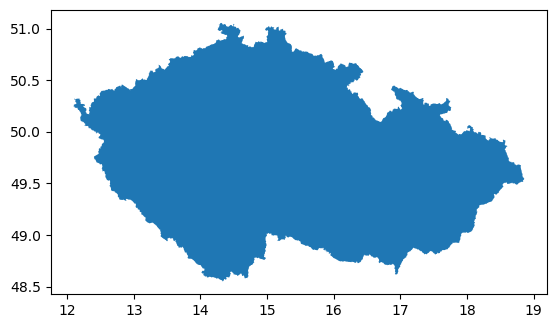

In [486]:
admin_country.plot()

In [488]:
from shapely.geometry import Point

In [568]:
literarni_obce = literarnost.head(50).index.to_list()
print(literarni_obce)
literarni_koordinaty = lokality[lokality['name'].isin(literarni_obce)]['coordinates'].to_list()
literarni_koordinaty = [l.split('(')[1].split(')')[0] for l in literarni_koordinaty]
literarni_koordinaty2 = []
for l in literarni_koordinaty:
    literarni_koordinaty2.append(Point(float(l.split(' ')[0]), float(l.split(' ')[1])))

['Hranice', 'Městec Králové', 'Sobotka', 'Jičín', 'Dačice', 'Nové Město na Moravě', 'Opočno', 'Mirotice', 'Jilemnice', 'Staré Město', 'Rychnov nad Kněžnou', 'Chlumec nad Cidlinou', 'Čeladná', 'Valtice', 'Náchod', 'Ledvice', 'Bavorov', 'Písek', 'Boskovice', 'Vysoké Mýto', 'Nymburk', 'Pelhřimov', 'Havlíčkův Brod', 'Litomyšl', 'Turnov', 'Benešov', 'Kutná Hora', 'Rakovník', 'Jaroměř', 'Ústí nad Orlicí', 'Kelč', 'Železnice', 'Jindřichův Hradec', 'Klatovy', 'Domažlice', 'Jevíčko', 'Krásno', 'Šumperk', 'Rýmařov', 'Rokycany', 'Duchcov', 'České Budějovice', 'Chrudim', 'Uherské Hradiště', 'Semily', 'Třebíč', 'Nová Včelnice', 'Příbram', 'Prachatice', 'Slaný']


Text(78.72222222222221, 0.5, 'Latitude')

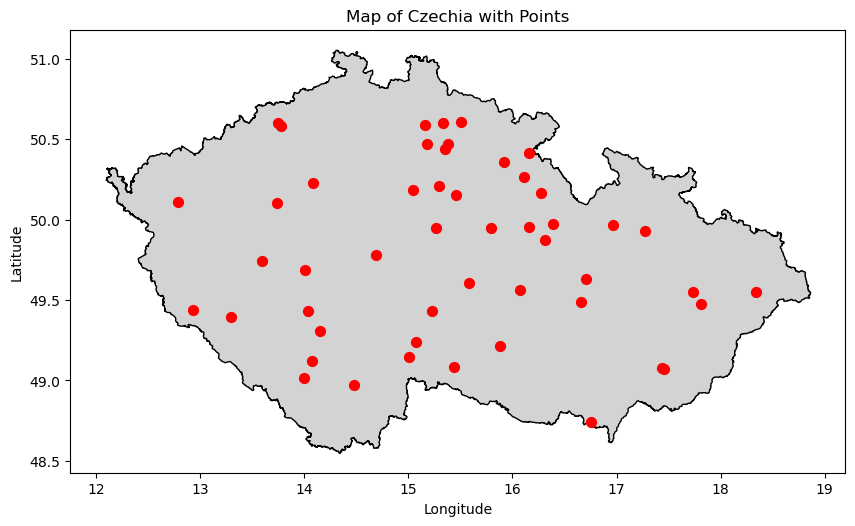

In [570]:
points_gdf = gpd.GeoDataFrame(geometry=literarni_koordinaty2, crs=admin_country.crs)
fig, ax = plt.subplots(figsize=(10, 10))
admin_country.plot(ax=ax, facecolor='lightgrey', edgecolor='black')

# Plot the points on top of the country boundary
points_gdf.plot(ax=ax, color='red', markersize=50)

# Customize the plot
plt.title('Map of Czechia with Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
